In [ ]:
'''
문제1 ) simple linear regression
온도에 따른 ozone량 예측하는 프로그램을 TensorFlow를 이용하여 작성한다.
제공된 CSV 파일로 부터 온도와 온도에 따른 ozone량 데이터를 loading후 학습과정을 진행하고 
특정 온도(화씨 62도)에 따른 ozone량을 예측한다.
'''

cost:1.2492084503173828
cost:0.033685240894556046
cost:0.028143201023340225
cost:0.024869868531823158
cost:0.02293645404279232
cost:0.021794460713863373
cost:0.021119922399520874
cost:0.02072150446474552
cost:0.020486176013946533
cost:0.020347176119685173


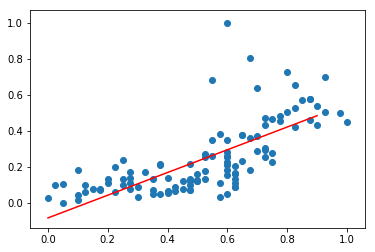

온도(화씨 62도)에 따른 ozone량은 [38.9701]입니다.


In [6]:
##Ozone data를 이용한 linear regression

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

##1. Data Loading
data0 = pd.read_csv("./Data/Ozone/ozone.csv", sep = ",")

#2. Training dataset
data=data0.dropna(how = "any", inplace = False)
x_data = pd.DataFrame(data, columns = ["Temp"])
x_data = (x_data - x_data.min())/(x_data.max() - x_data.min())

y_data = pd.DataFrame(data, columns = ["Ozone"])
y_data = (y_data - y_data.min())/(y_data.max() - y_data.min())

plt.scatter(x_data,y_data)
#이상치 변형 필요
#3. placeholder
X = tf.placeholder(dtype = tf.float32)
Y = tf.placeholder(dtype = tf.float32)

#4. Weight &bias
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#5. Hypothesis
H = W*X + b

#6. cost function
cost = tf.reduce_mean(tf.square(H-Y))

#7. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

#8. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#9. 학습 W와 b값을 조정해가는 과정
for step in range(3000):
    _,cost_val = sess.run([train,cost],feed_dict = {X:x_data, Y:y_data})
    if step % 300 == 0:
        print("cost:{}".format(cost_val))
              
#10.Prediction
result = sess.run(H,feed_dict ={X:62})


x_line = np.arange(0.0,1.0,0.1)
y_line = np.array([sess.run(W)*t+sess.run(b) for t in x_line])
plt.plot(x_line, y_line,"r")
plt.show()
print("온도(화씨 62도)에 따른 ozone량은 {}입니다.".format(result))